In [11]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras.datasets.mnist as mnist

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
print(x_train.shape, type(x_train), y_train.shape, type(y_train))

(60000, 28, 28) <class 'numpy.ndarray'> (60000,) <class 'numpy.ndarray'>


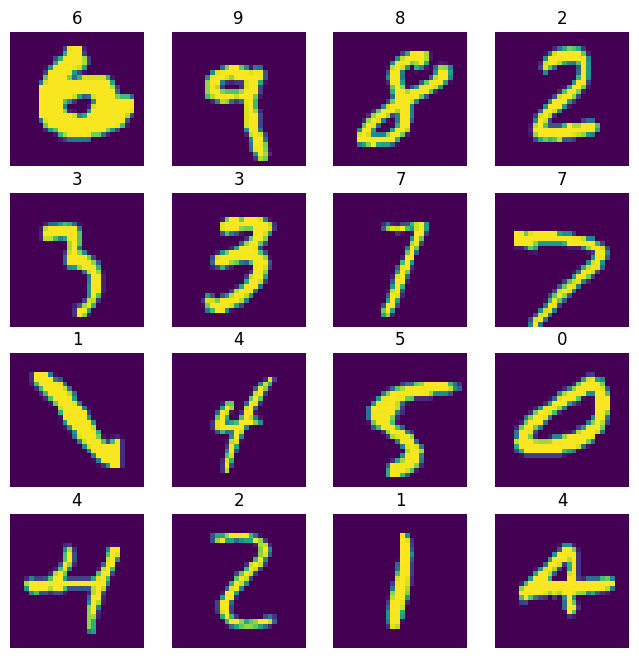

In [14]:
import matplotlib.pyplot as plt
import random

random_idx = np.random.randint(0, len(train_images), size=16)

plt.figure(figsize=(8, 8))

for i, idx in enumerate(random_idx) :
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[idx])
    plt.axis('off')
    plt.title(y_train[idx])

plt.show()

In [15]:
from tensorflow.keras.utils import to_categorical

print(x_train.shape, type(x_train), y_train.shape, type(y_train))

x_train = np.array(x_train) / 255
x_test = np.array(x_test) /255

print(x_train.shape, type(x_train), y_train.shape, type(y_train))

y_train = to_categorical(np.array(y_train))
y_test = to_categorical(np.array(y_test))

(60000, 28, 28) <class 'numpy.ndarray'> (60000,) <class 'numpy.ndarray'>
(60000, 28, 28) <class 'numpy.ndarray'> (60000,) <class 'numpy.ndarray'>


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

model = Sequential()
model.add(Dense(512, input_shape=(28, 28), activation='relu'))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 28, 512)        │        14,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14336)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,670,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,687,690 (14.07 MB)

 Trainable params: 3,687,690 (14.07 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - acc: 0.8836 - loss: 0.3686 - val_acc: 0.9678 - val_loss: 0.1092
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - acc: 0.9722 - loss: 0.0921 - val_acc: 0.9747 - val_loss: 0.0856
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - acc: 0.9817 - loss: 0.0593 - val_acc: 0.9758 - val_loss: 0.0810
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - acc: 0.9875 - loss: 0.0423 - val_acc: 0.9789 - val_loss: 0.0741
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - acc: 0.9904 - loss: 0.0298 - val_acc: 0.9787 - val_loss: 0.0767
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - acc: 0.9907 - loss: 0.0266 - val_acc: 0.9780 - val_loss: 0.0882
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - acc: 0.9938 - loss: 0.0195 - val_acc: 0.9791 - val_loss: 0.0821
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - acc: 0.9935 - loss: 0.0184 - val_acc: 0.9803 - val_loss: 0.0817
Epoch 9/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 

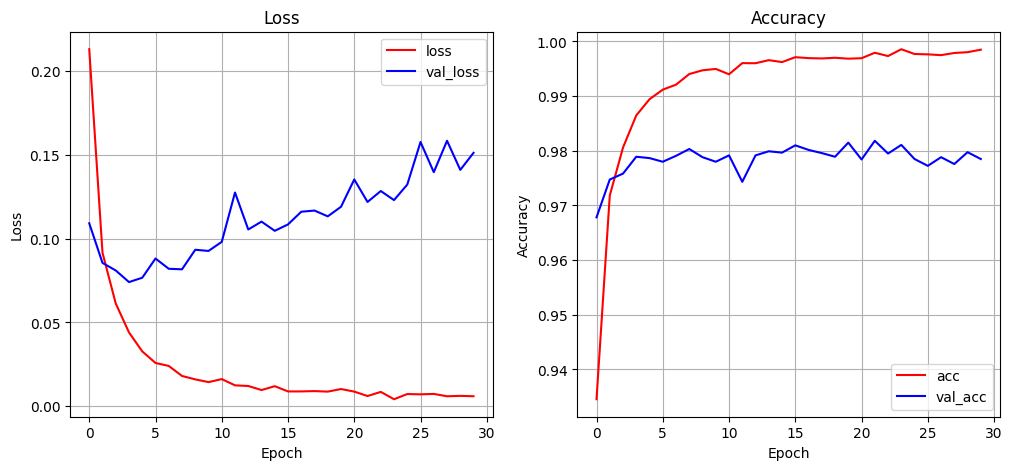

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss', color='red')
plt.plot(history.history['val_loss'], label='val_loss', color='blue')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='acc', color='red')
plt.plot(history.history['val_acc'], label='val_acc', color='blue')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9738 - loss: 0.1495
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[4.0741226e-23 9.4608638e-19 7.6677223e-19 4.0730298e-14 2.6850447e-31
 7.8282522e-15 9.4849883e-30 1.0000000e+00 3.0723419e-23 7.5024215e-20] 7


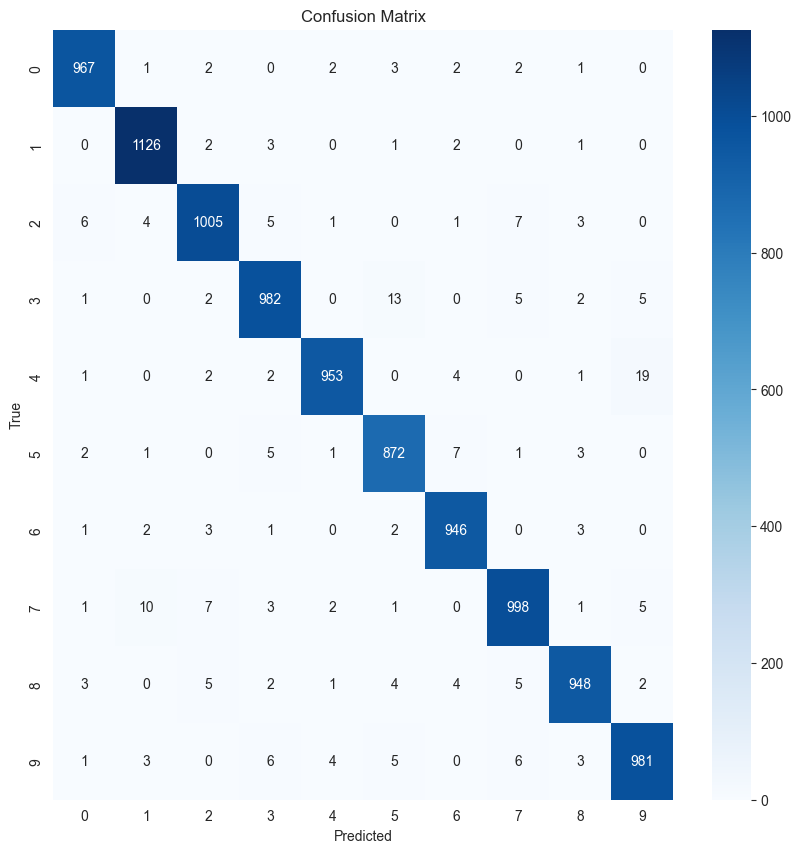

In [19]:
from sklearn.metrics import confusion_matrix

model.evaluate(x_test, y_test)

pred_ys = model.predict(x_test)
print(pred_ys[0], np.argmax(pred_ys[0]))


plt.figure(figsize=(10, 10))
sns.set_style('whitegrid')
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.legend()
# plt.grid()

plt.show()